In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import activations

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
# for 2nd attempt
# for initializzation of parameters
from keras.initializers import glorot_uniform
from keras.callbacks import EarlyStopping

import keras.backend as K

# Setting up and training a 1d Neural Network in tensorflow

## Aim
To learn the basic notation for implementing multi-layer artificial Neural Networks using Keras/TensorFlow. The function in this case is the curve: 

$f(x) = \sin(x)$

In [3]:
# let's choose a simple 1->1 function to train
def f(x):
    return np.sin(x)**2

In [4]:
# check it works...
print(f(np.pi/2))

1.0


In [5]:
# evaluate some data points
datasize = 5000
datapoints = np.linspace(-2,2,datasize)
datavalues = f(datapoints)
data = np.transpose([datapoints,datavalues])

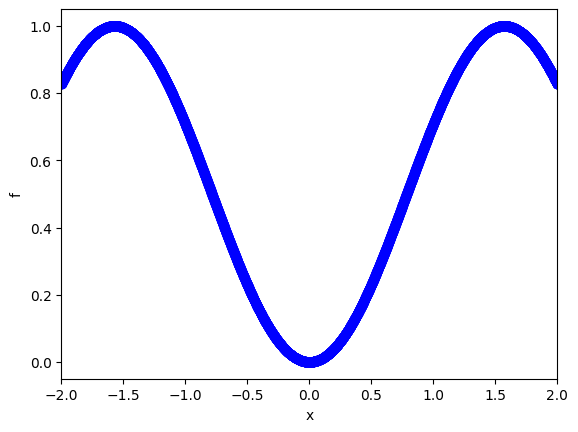

In [6]:
# plot the data points to see how they are distributed
plt.plot(datapoints, datavalues, 'bo')
plt.xlim([-2,2])
plt.ylabel('f')
plt.xlabel('x');

In [7]:
# Initialise model: 1-N-1
hiddenlayerdepth = 4
model = Sequential([
    Dense(hiddenlayerdepth, activation='tanh', input_shape=(1,)),
    Dense(1)  # all the nodes of a previous layer are connected to the next one
])

model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error')

2023-11-03 15:38:45.554503: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [8]:
# demonstration of how to take slices of numpy arrays
print(data[0:2,0])
print(data[0:2,1])
print(f(1.20030495))

[-2.         -1.99919984]
[0.82682181 0.82742695]
0.8689027716812022


In [9]:
## split into testing and training sets 20:80
print(len(data))
split = int(len(data)*80/100)
print(split)

5000
4000


In [10]:
# fit the model with the data and save the information about the training
history = model.fit(
    data[0:split,0],
    data[0:split,1],
    epochs=150,
    validation_data=(data[split:,0], data[split:,1]),
    verbose=1
)

Epoch 1/150
125/125 [==============================] - 2s 15ms/step - loss: 0.4167 - val_loss: 0.5957
Epoch 2/150
125/125 [==============================] - 3s 20ms/step - loss: 0.1747 - val_loss: 0.8003
Epoch 3/150
125/125 [==============================] - 2s 12ms/step - loss: 0.1309 - val_loss: 0.8514
Epoch 4/150
125/125 [==============================] - 2s 13ms/step - loss: 0.1190 - val_loss: 0.8310
Epoch 5/150
125/125 [==============================] - 2s 18ms/step - loss: 0.1099 - val_loss: 0.7985
Epoch 6/150
125/125 [==============================] - 2s 13ms/step - loss: 0.1019 - val_loss: 0.7697
Epoch 7/150
125/125 [==============================] - 1s 11ms/step - loss: 0.0944 - val_loss: 0.7103
Epoch 8/150
125/125 [==============================] - 2s 18ms/step - loss: 0.0866 - val_loss: 0.6666
Epoch 9/150
125/125 [==============================] - 2s 15ms/step - loss: 0.0784 - val_loss: 0.5858
Epoch 10/150
125/125 [==============================] - 2s 18ms/step - loss: 0.069

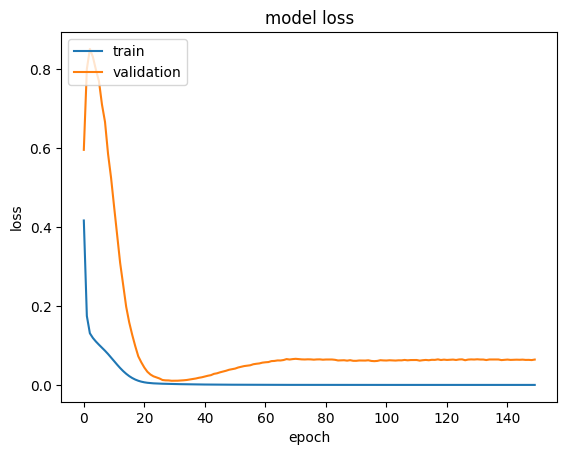

In [11]:
# now we can plot the history to see how the loss function for the
# training and validation set changed with epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [12]:
print(model.predict([1]))
print(f(1))

print(model.predict([0.1]))
print(f(0.1))

1/1 [==============================] - 0s 124ms/step
[[0.7070728]]
0.7080734182735712
1/1 [==============================] - 0s 92ms/step
[[0.00895602]]
0.009966711079379185


In [13]:
datapoints2 = np.linspace(-2,2,1000)
datavalues2 = f(datapoints2)
datavaluespred = model.predict(datapoints2)

32/32 [==============================] - 0s 13ms/step


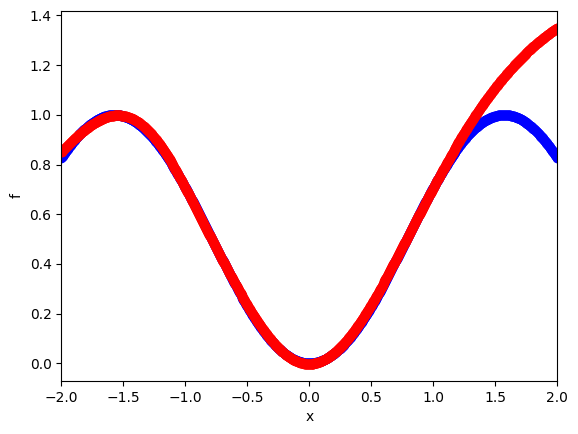

In [14]:
plt.plot(datapoints2, datavalues2, 'bo')
plt.plot(datapoints2, datavaluespred, 'ro')
plt.xlim([-2,2])
plt.ylabel('f')
plt.xlabel('x');

# Let's try again with a more complicated model

In [15]:
# try again with early stopping criteria
tf.keras.backend.clear_session()

In [16]:
# Initialise model: 1-16-16-1
model2 = Sequential([
    Dense(4, activation='tanh', input_shape=(1,)),
    Dense(4, activation='tanh', input_shape=(1,)),
    Dense(1)
])

model2.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error')

In [17]:
ES = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=100,
    verbose=1,
    restore_best_weights=True)

history2 = model2.fit(
    data[0:split,0],
    data[0:split,1],
    epochs=500,
    validation_data=(data[split:,0], data[split:,1]),
    callbacks=[ES],
    batch_size=128,
    verbose=0
)

Restoring model weights from the end of the best epoch: 47.
Epoch 147: early stopping


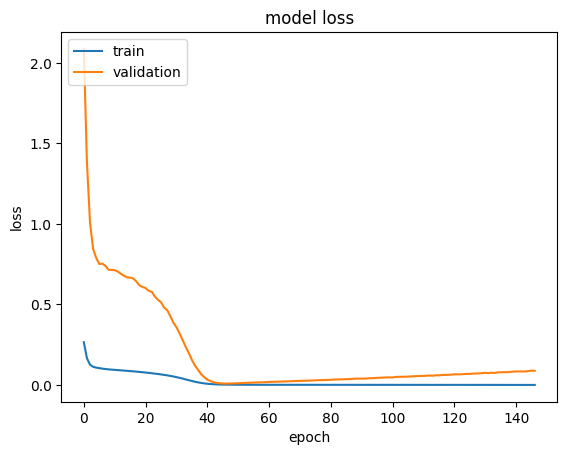

In [18]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

32/32 [==============================] - 0s 9ms/step


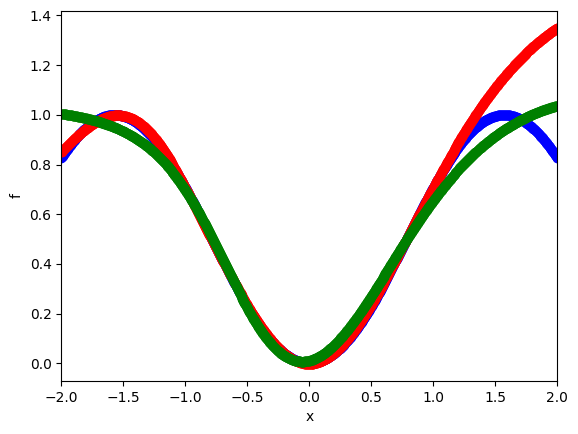

In [19]:
datavaluespred2 = model2.predict(datapoints2)

plt.plot(datapoints2, datavalues2, 'bo')
plt.plot(datapoints2, datavaluespred, 'ro')
plt.plot(datapoints2, datavaluespred2, 'go')
plt.xlim([-2,2])
plt.ylabel('f')
plt.xlabel('x');

# Questions

1. Is 5000 points a sensible sample size? How do the fits change if you reduce or increase the data set?
2. Is the 2nd model better of worse the the simple model with one hidden layer? What if we increase the number of nodes in the single hidden layer of the first model?
3. What does the argument 'batch_size' do? What is a good value that optimises the training?
4. Vary the early stopping parameters to see how they effect the training
5. What is the effect of changing the activation function?